### Importing libraries

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

%matplotlib inline

### Linear Regression

Let's make a database of miles driven in a car, it's age and the number of crashes the car was involved in. 

In [2]:
df = pd.DataFrame([
    {"miles": 2000, "car_age": 4, "crashes": 2},
    {"miles": 2000, "car_age": 2, "crashes": 0},
    {"miles": 2000, "car_age": 6, "crashes": 3},
    {"miles": 5000, "car_age": 10, "crashes": 3},
    {"miles": 5000, "car_age": 3, "crashes": 6},
    {"miles": 5000, "car_age": 6, "crashes": 5}
])

df

,miles,car_age,crashes
0,2000,4,2
1,2000,2,0
2,2000,6,3
3,5000,10,3
4,5000,3,6
5,5000,6,5


What effect does the distance driven have on the number of crashes? This is where linear regression comes in.

OR MORE TECHNICALLY, how do the inputs affect the end-result?

#### Computing a linear regression

In [3]:
### what effect does the distance driven have on the number of crashes?
model = smf.ols(formula = 'crashes ~ miles', data = df)
results = model.fit()
results.summary()

/Users/shirshodasgupta/Documents/Python/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     5.786
Date:                Sat, 03 Feb 2024   Prob (F-statistic):             0.0739
Time:                        19:08:39   Log-Likelihood:                -9.8391
No. Observations:                   6   AIC:                             23.68
Df Residuals:                       4   BIC:                             23.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3333      1.583     -0.211      0.844      -4.729       4.062
miles          0.0010      0.000      2.405      0.074      -0.000       0.002
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.429
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.708
Skew:                          -0.382   Prob(JB):                        0.702
Kurtosis:                       1.500   Cond. No.                     9.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What is our coefficient for `miles`? 0.0010.

In other words, for every mile the person drives, he crashes an additional 0.001 times.

But that's hard to understand. Especially given that just by eyeballing the data we know it's one crash for every 1,000 miles.

<Axes: xlabel='miles', ylabel='crashes'>

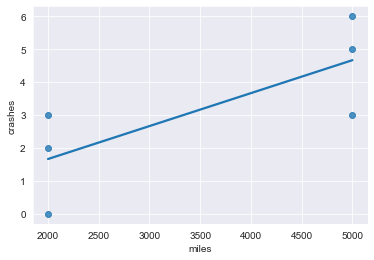

In [4]:
sns.regplot(x = 'miles', y = 'crashes', ci = None, data = df)

In [5]:
model = smf.ols(formula='crashes ~ np.divide(miles, 1000)', data=df)
results = model.fit()
results.summary()

/Users/shirshodasgupta/Documents/Python/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     5.786
Date:                Sat, 03 Feb 2024   Prob (F-statistic):             0.0739
Time:                        19:08:40   Log-Likelihood:                -9.8391
No. Observations:                   6   AIC:                             23.68
Df Residuals:                       4   BIC:                             23.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.3333      1.583     -0.211      0.844      -4.729       4.062
np.divide(miles, 1000)     1.0000      0.416      2.405      0.074      -0.154       2.154
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.429
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.708
Skew:                          -0.382   Prob(JB):                        0.702
Kurtosis:                       1.500   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What do we get for `miles` now? 1.00.

In other words, for every 1,000 miles driven we get 1 crash.

In [6]:
model = smf.ols(formula='crashes ~ np.divide(miles, 1000) + car_age', data=df)
results = model.fit()
results.summary()

/Users/shirshodasgupta/Documents/Python/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     2.452
Date:                Sat, 03 Feb 2024   Prob (F-statistic):              0.234
Time:                        19:08:40   Log-Likelihood:                -9.6168
No. Observations:                   6   AIC:                             25.23
Df Residuals:                       3   BIC:                             24.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0159      1.906      0.008      0.994      -6.049       6.080
np.divide(miles, 1000)     1.1111      0.517      2.148      0.121      -0.535       2.757
car_age                   -0.1429      0.297     -0.480      0.664      -1.089       0.804
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.454
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.455
Skew:                          -0.384   Prob(JB):                        0.796
Kurtosis:                       1.890   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here again you get 1.1111 or 1 crash for every 1,000 miles.

#### Evaluating regressions

In [7]:
model = smf.ols(formula='crashes ~ np.divide(miles, 1000)', data=df)
results = model.fit()
results.summary()

/Users/shirshodasgupta/Documents/Python/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     5.786
Date:                Sat, 03 Feb 2024   Prob (F-statistic):             0.0739
Time:                        19:08:40   Log-Likelihood:                -9.8391
No. Observations:                   6   AIC:                             23.68
Df Residuals:                       4   BIC:                             23.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.3333      1.583     -0.211      0.844      -4.729       4.062
np.divide(miles, 1000)     1.0000      0.416      2.405      0.074      -0.154       2.154
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.429
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.708
Skew:                          -0.382   Prob(JB):                        0.702
Kurtosis:                       1.500   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### P-values

The p-value for the overall regression is given by `Prob (F-statistic)`. So here, that is 0.074.

The features included in the model also get p-values given by `P>|t|`. So for `np.divide(miles, 1000)` that is 0.074.

Now as a rule of thumb, you want your p-value to be less than 0.05. That means that there's only a 5% chance that the model is explaining your phenomenon by accident. The higher the p-value the worse the model is. So 0.07? Close, but not so great!

##### R-squared

We also have this variable called `R-squared` which in this case is 0.591. This means that the distance driven accounts for 59.1% or around 60% (or nearly two-thirds) of the crashes. The other 40% is due to contingent factors like weather, luck, other drivers, etc.

(In the example of toy sales, the value is 1 because no one is paying anything extra so 100% of the revenue can be correlated to number of toys sold. Think about the same example but for sales of tacos or coffee — the "extra" value or the contingent factor will come from tips!)

##### Adjusted R-squared

In [8]:
model = smf.ols(formula='crashes ~ np.divide(miles, 1000)', data=df)
results = model.fit()
results.summary()

/Users/shirshodasgupta/Documents/Python/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     5.786
Date:                Sat, 03 Feb 2024   Prob (F-statistic):             0.0739
Time:                        19:08:40   Log-Likelihood:                -9.8391
No. Observations:                   6   AIC:                             23.68
Df Residuals:                       4   BIC:                             23.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.3333      1.583     -0.211      0.844      -4.729       4.062
np.divide(miles, 1000)     1.0000      0.416      2.405      0.074      -0.154       2.154
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.429
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.708
Skew:                          -0.382   Prob(JB):                        0.702
Kurtosis:                       1.500   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
model = smf.ols(formula='crashes ~ np.divide(miles, 1000) + car_age', data=df)
results = model.fit()
results.summary()

/Users/shirshodasgupta/Documents/Python/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     2.452
Date:                Sat, 03 Feb 2024   Prob (F-statistic):              0.234
Time:                        19:08:40   Log-Likelihood:                -9.6168
No. Observations:                   6   AIC:                             25.23
Df Residuals:                       3   BIC:                             24.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0159      1.906      0.008      0.994      -6.049       6.080
np.divide(miles, 1000)     1.1111      0.517      2.148      0.121      -0.535       2.757
car_age                   -0.1429      0.297     -0.480      0.664      -1.089       0.804
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.454
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.455
Skew:                          -0.384   Prob(JB):                        0.796
Kurtosis:                       1.890   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this case the `R-squared` is 0.62 or 62%; which is higher than 0.59 or 59% from the previous regression with one variable (distance).

If adjusted r-squared goes up we probably have a better model.

So might think that this model is better but there's a catch: A regression model with more features is going to explain a phenomenon "better" than a model with one feature, even if the extra features are only explaining random noise.

In other words, each time we add a variable to a linear regression model, the `R-squared` will always go up.

So we look at the data-point below the `R-squared` — the `Adj. R-squared`.

The Adjusted R-Squared adjusts for the number of features included in the model.

In the previous model, the `Adj. R-squared` was 0.489 or 49% while for this model it is 0.367 or 37%. So in fact by this standard, the previous model was better!

NOTE: The `F-statistic`, `Prob (F-statistic)`, `Log-Likelihood`, `AIC` and `BIC` are also sometimes important to evaluate which model is better — but those are much more complicated. Talk to a statistician!

Here the p-values for the regression is 0.234, that for distance covered is 0.121 and for age of the car, it's 0.664.

All of these are much, much higher than the 0.05 standard. Throw this model away!

NOTE: We don't use p-values to choose between models. That is done through the adjusted r-squared and the other variables noted below that. We just use p-values to check if the model meets statistical standards of quality.

### Logistic Regressions

Let's make a dataset of miles driven and whether a car has broken down at least once during that time (designated in 0 for no breakdown and 1 for a minimum of one breakdown).

In [10]:
df = pd.DataFrame([
    { "miles": 3750, "breakdown": 0 },
    { "miles": 5000, "breakdown": 0 },
    { "miles": 5000, "breakdown": 0 },
    { "miles": 6000, "breakdown": 1 },
    { "miles": 6000, "breakdown": 0 },
    { "miles": 7000, "breakdown": 1 },
    { "miles": 7000, "breakdown": 0 },
    { "miles": 8500, "breakdown": 1 },
    { "miles": 8500, "breakdown": 1 },
    { "miles": 8500, "breakdown": 1 },
    { "miles": 8500, "breakdown": 1 },
])

df

,miles,breakdown
0,3750,0
1,5000,0
2,5000,0
3,6000,1
4,6000,0
5,7000,1
6,7000,0
7,8500,1
8,8500,1
9,8500,1


What effect does the distance driven have on the likelihood that a car will breakdown?

In [11]:
model = smf.logit(formula = 'breakdown ~ miles', data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.309932
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              breakdown   No. Observations:                   11
Model:                          Logit   Df Residuals:                        9
Method:                           MLE   Df Model:                            1
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.5502
Time:                        19:08:40   Log-Likelihood:                -3.4093
converged:                       True   LL-Null:                       -7.5791
Covariance Type:            nonrobust   LLR p-value:                  0.003879
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.7225      6.795     -1.725      0.085     -25.041       1.596
miles          0.0018      0.001      1.746      0.081      -0.000       0.004
==============================================================================
"""

In [12]:
coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'name': results.params.index
})
coefs

,coef,odds ratio,name
0,-11.722467,0.000008,Intercept
1,0.001800,1.001801,miles


NOTE: The p-value for the odds ratio is > 0.05. In the statistical (or journalism) world, this model isn't that good!

odds = chance of an event occuring / chance of that event not occuring

For each mile we add, the odds of a breakdown increases by 1.002 times. In other words, the more you drive, the more your chances of a breakdown increases.

Consider another example: Say we knit scarves (the shorter the scarf, the more likely we are to finish knitting) and the odds ratio for actually finishing is 0.89 for each inch. In that case, for each inch we add to the scarf, the odds for finishing 0.89 times the odds we did before. In other words, the probability of finishing decreases by 11% for each inch.

Relationship between odds ratio and an event occuring —
- Odds ratio > 1 : More likely
- Odds ratio = 1 : No change in likelihood
- Odds ratio < 1 : Less likely

In [13]:
odds = pd.DataFrame([
    { "description": "Drive 1000 miles, breakdown 500 times",
      "probability": "500/1000 = 0.5 or 50% chance of a breakdown",
      "odds": "50:50 odds, 50/50 = 1:1 odds"},
    { "description": "Drive 200 miles, breakdown 80 times",
      "probability": "80/200 = 0.4 or 40% chance of a breakdown",
      "odds": "40:60 odds, 40/60 = 0.66 or 2:3 odds"},
    { "description": "Drive 1000 miles, breakdown 750 times",
      "probability": "750/1000 = 0.75 or 75% chance of a breakdown",
      "odds": "75:25 odds, 75/25 = 3.0 or 3:1 odds"},
    { "description": "Drive 800 miles, breakdown 760 times",
      "probability": "760/800 = 0.95 or 95% chance of a breakdown",
      "odds": "95:5 odds, 95/5 = 19 or 19:1 odds"}
])

odds

,description,probability,odds
0,"Drive 1000 miles, breakdown 500 times",500/1000 = 0.5 or 50% chance of a breakdown,"50:50 odds, 50/50 = 1:1 odds"
1,"Drive 200 miles, breakdown 80 times",80/200 = 0.4 or 40% chance of a breakdown,"40:60 odds, 40/60 = 0.66 or 2:3 odds"
2,"Drive 1000 miles, breakdown 750 times",750/1000 = 0.75 or 75% chance of a breakdown,"75:25 odds, 75/25 = 3.0 or 3:1 odds"
3,"Drive 800 miles, breakdown 760 times",760/800 = 0.95 or 95% chance of a breakdown,"95:5 odds, 95/5 = 19 or 19:1 odds"


Probability x Odds conversion formulae:
- probability = odds / (odds + 1)
- odds = probability / (1 - probability)

In [14]:
### converts probability of 0.94 or 94% to odds ratio
0.94/(1-0.94)

15.666666666666652

Probability of 0.94 or 94% is equal to an odds of 15.67

In [15]:
### converts odds of 2 to probability
2/(2+1)

0.6666666666666666

Odds of 2 is equal to a probability of 67%

In [16]:
unknown = pd.DataFrame([
    { "miles": 5000 },
    { "miles": 5500},
    { "miles": 9000 },
    { "miles": 7500 },
    { "miles": 8000 },
    { "miles": 10000 },
])

unknown['predicted'] = results.predict(unknown)
unknown

,miles,predicted
0,5000,0.061534
1,5500,0.138851
2,9000,0.988722
3,7500,0.854986
4,8000,0.935477
5,10000,0.998117


The probability of a breakdown occuring after driving 7,500 miles is 85.5%, 9,000 miles is 98.9% and so on.

In our initial dataset on which we trained this model, there are no breakdowns for 5,000 miles and below. Here though, the probability of a breakdown after 5,000 miles is 6% — it's low but the likelihood exists.

The fact that we kept breaking down after longer distances is making the model cynical and pessimistic!

Why not just use percents? Because this is about odds and likelihoods!

In [17]:
table = pd.DataFrame([
    { "probability": "50/100 or 50%",
      "odds": "1:1 or 1.0",
      "odds doubled": "1.0 * 2 = 2",
      "percent": "2/(2+1)",
      "new percent": "0.67 or 67%",
      "increase": "(67% - 15%) or +17 percent points"},
    { "probability": "20/100 or 20%",
      "odds": "1:4 or 0.25",
      "odds doubled": "0.25 * 2 = 0.5",
      "percent": "0.5/(0.5+1)",
      "new percent": "0.33 or 33%",
      "increase": "(33% - 20%) or +13 percent points"},
    { "probability": "75/100 or 75%",
      "odds": "3:1 or 3.0",
      "odds doubled": "3.0 * 2 = 6",
      "percent": "6/(6+1)",
      "new percent": "0.86 or 86%",
      "increase": "(86% - 75%) or +11 percent points"},
])

table

,probability,odds,odds doubled,percent,new percent,increase
0,50/100 or 50%,1:1 or 1.0,1.0 * 2 = 2,2/(2+1),0.67 or 67%,(67% - 15%) or +17 percent points
1,20/100 or 20%,1:4 or 0.25,0.25 * 2 = 0.5,0.5/(0.5+1),0.33 or 33%,(33% - 20%) or +13 percent points
2,75/100 or 75%,3:1 or 3.0,3.0 * 2 = 6,6/(6+1),0.86 or 86%,(86% - 75%) or +11 percent points


#### Another example

Let's look at knitting scarves!

Variables
- `length_in`: length of the scarf in inches
- `large_gauge`: whether a bigger needle was used (1 = yes; 0 = no)
- `color`: color of the thread
- `completed`: whether the scarf was completed (1 = yes; 0 = no)

In [18]:
df = pd.DataFrame([
    { "length_in": 55, "large_gauge": 1, "color": "orange", "completed": 1 },
    { "length_in": 55, "large_gauge": 0, "color": "orange", "completed": 1 },
    { "length_in": 55, "large_gauge": 0, "color": "brown", "completed": 1 },
    { "length_in": 60, "large_gauge": 0, "color": "brown", "completed": 1 },
    { "length_in": 60, "large_gauge": 0, "color": "grey", "completed": 0 },
    { "length_in": 70, "large_gauge": 0, "color": "grey", "completed": 1 },
    { "length_in": 70, "large_gauge": 0, "color": "orange", "completed": 0 },
    { "length_in": 82, "large_gauge": 1, "color": "grey", "completed": 1 },
    { "length_in": 82, "large_gauge": 0, "color": "brown", "completed": 0 },
    { "length_in": 82, "large_gauge": 0, "color": "orange", "completed": 0 },
    { "length_in": 82, "large_gauge": 1, "color": "brown", "completed": 0 },
])

df

,length_in,large_gauge,color,completed
0,55,1,orange,1
1,55,0,orange,1
2,55,0,brown,1
3,60,0,brown,1
4,60,0,grey,0
5,70,0,grey,1
6,70,0,orange,0
7,82,1,grey,1
8,82,0,brown,0
9,82,0,orange,0


In [19]:
model = smf.logit("completed ~ length_in", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.531806
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              completed   No. Observations:                   11
Model:                          Logit   Df Residuals:                        9
Method:                           MLE   Df Model:                            1
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.2282
Time:                        19:08:40   Log-Likelihood:                -5.8499
converged:                       True   LL-Null:                       -7.5791
Covariance Type:            nonrobust   LLR p-value:                   0.06293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8531      4.736      1.658      0.097      -1.429      17.135
length_in     -0.1112      0.067     -1.649      0.099      -0.243       0.021
==============================================================================
"""

In [20]:
coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'name': results.params.index
})
coefs

,coef,odds ratio,name
0,7.853131,2573.780516,Intercept
1,-0.111171,0.894786,length_in


For each additional inch, we have an odds of completion of 0.89x or a decrease of 11% (=100 - 89).

In [21]:
model = smf.logit("completed ~ length_in + large_gauge", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.449028
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              completed   No. Observations:                   11
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            2
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.3483
Time:                        19:08:40   Log-Likelihood:                -4.9393
converged:                       True   LL-Null:                       -7.5791
Covariance Type:            nonrobust   LLR p-value:                   0.07138
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.0850      7.615      1.587      0.113      -2.840      27.010
length_in      -0.1833      0.117     -1.573      0.116      -0.412       0.045
large_gauge     2.9609      2.589      1.144      0.253      -2.113       8.035
===============================================================================
"""

In [22]:
coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'name': results.params.index
})

coefs

,coef,odds ratio,name
0,12.085035,177200.102739,Intercept
1,-0.183318,0.832504,length_in
2,2.960890,19.315158,large_gauge


Our odds of completion for completing a scarf drops to 83% (from the previous 89%).

BUT, if we use large gauge needles, our odds increases 19 times!

NOTE: This is the source of phrases like "everything else being equal" or "controlling for other factors." In this case, we're judging the performance of large gauge needles controlling for the length of a scarf. For every inch we add, we're seeing the effect of that inch, everything else being equal (if "everything else" is "are we using large gauge needles?").

When we look at the effect of a single feature, each variable we include in the regression is being balanced out.

So far we've looked at numeric variables (`length_in`) and boolean ones (`large_gauge` and `completed`).

Let's add another type: Categorical variables (in this case, `color`)

In [23]:
### defining a categorical variable with "C()"
model = smf.logit("completed ~ length_in + large_gauge + C(color)", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.424906
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              completed   No. Observations:                   11
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            4
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.3833
Time:                        19:08:40   Log-Likelihood:                -4.6740
converged:                       True   LL-Null:                       -7.5791
Covariance Type:            nonrobust   LLR p-value:                    0.2138
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.5839      7.995      1.574      0.115      -3.086      28.254
C(color)[T.grey]       1.0113      1.906      0.531      0.596      -2.725       4.748
C(color)[T.orange]    -0.4594      2.257     -0.204      0.839      -4.884       3.965
length_in             -0.1944      0.126     -1.540      0.124      -0.442       0.053
large_gauge            2.8814      2.845      1.013      0.311      -2.694       8.457
======================================================================================
"""

In [24]:
coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'name': results.params.index
})

coefs

,coef,odds ratio,name
0,12.583941,291834.232692,Intercept
1,1.011347,2.749302,C(color)[T.grey]
2,-0.459412,0.631655,C(color)[T.orange]
3,-0.194425,0.823308,length_in
4,2.881375,17.838786,large_gauge


Switching to grey gives us a 2.7x improvement in our odds, while orange penalizes our odds of completion by 0.63x.

But how many colors were there?

In [25]:
df.color.value_counts()

orange    4
brown     4
grey      3
Name: color, dtype: int64

So where's brown?

By default the model has chosen brown to be the reference category, or the category against which the others are measured.
In other words, grey gives us a 2.7x improvement in our odds *compared to using brown*. Orange penalizes our odds of completion by 0.64x, *compared to using brown*.

But we can define our own reference categories:

In [26]:
model = smf.logit("completed ~ length_in + large_gauge + C(color, Treatment('orange'))", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.424906
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              completed   No. Observations:                   11
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            4
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.3833
Time:                        19:08:40   Log-Likelihood:                -4.6740
converged:                       True   LL-Null:                       -7.5791
Covariance Type:            nonrobust   LLR p-value:                    0.2138
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 12.1245      8.094      1.498      0.134      -3.740      27.989
C(color, Treatment('orange'))[T.brown]     0.4594      2.257      0.204      0.839      -3.965       4.884
C(color, Treatment('orange'))[T.grey]      1.4708      2.289      0.643      0.520      -3.015       5.957
length_in                                 -0.1944      0.126     -1.540      0.124      -0.442       0.053
large_gauge                                2.8814      2.845      1.013      0.311      -2.694       8.457
==========================================================================================================
"""

In [27]:
coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'name': results.params.index
})
coefs

,coef,odds ratio,name
0,12.124529,184338.541216,Intercept
1,0.459412,1.583143,"C(color, Treatment('orange'))[T.brown]"
2,1.470759,4.352538,"C(color, Treatment('orange'))[T.grey]"
3,-0.194425,0.823308,length_in
4,2.881375,17.838786,large_gauge


The odds of finishing when using grey is 4.4x times better than when using orange; the odds when using brown becomes 1.6x compared to orange.

#### Evaluating regressions

##### P-values

The p-value for a regression model must be lesser than 0.05!

In the model above the p-value is 0.2138 (for logistic regressions, this is given by `LLR p-value`) — frankly, terrible!

The p-values for each of the variables/features (given by `P>|z|`) are also incredibly high. For brown it's at 84%, for grey, at 50%!

Let's remove the color feature and try again!

In [28]:
model = smf.logit("completed ~ length_in + large_gauge", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.449028
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              completed   No. Observations:                   11
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            2
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.3483
Time:                        19:08:40   Log-Likelihood:                -4.9393
converged:                       True   LL-Null:                       -7.5791
Covariance Type:            nonrobust   LLR p-value:                   0.07138
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.0850      7.615      1.587      0.113      -2.840      27.010
length_in      -0.1833      0.117     -1.573      0.116      -0.412       0.045
large_gauge     2.9609      2.589      1.144      0.253      -2.113       8.035
===============================================================================
"""

The overall p-value of the model has now improved to 0.07 but the findings from each feature is still not usable.

##### Pseudo R-squared

Let's run the models again with and without color.

In [29]:
model = smf.logit("completed ~ length_in + large_gauge + C(color, Treatment('orange'))", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.424906
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              completed   No. Observations:                   11
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            4
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.3833
Time:                        19:08:40   Log-Likelihood:                -4.6740
converged:                       True   LL-Null:                       -7.5791
Covariance Type:            nonrobust   LLR p-value:                    0.2138
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 12.1245      8.094      1.498      0.134      -3.740      27.989
C(color, Treatment('orange'))[T.brown]     0.4594      2.257      0.204      0.839      -3.965       4.884
C(color, Treatment('orange'))[T.grey]      1.4708      2.289      0.643      0.520      -3.015       5.957
length_in                                 -0.1944      0.126     -1.540      0.124      -0.442       0.053
large_gauge                                2.8814      2.845      1.013      0.311      -2.694       8.457
==========================================================================================================
"""

In [30]:
model = smf.logit("completed ~ length_in + large_gauge", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.449028
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              completed   No. Observations:                   11
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            2
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.3483
Time:                        19:08:40   Log-Likelihood:                -4.9393
converged:                       True   LL-Null:                       -7.5791
Covariance Type:            nonrobust   LLR p-value:                   0.07138
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.0850      7.615      1.587      0.113      -2.840      27.010
length_in      -0.1833      0.117     -1.573      0.116      -0.412       0.045
large_gauge     2.9609      2.589      1.144      0.253      -2.113       8.035
===============================================================================
"""

For logistic regressions, we check the value for `Pseudo R-squared`.

Without colors, that is 0.35 and with colors it is 0.38.

In linear regression, the closer the R-square is to 1, the better the model. But in logistic regression, we can't talk in absolute terms, we can only compare the pseudo-R-squareds of two (or more) models and say "okay, this model with the higher pseudo-R-squared is better than that" — that's about all we can say.


We might think that the model with colors is better because it has a higher value for pseudo-r-squared but do we then go back to it? Not at all! The p-values for that model as we saw above are just simply too high!

NOTE:

There are multiple versions of pseudo R-squared for logistic regression. Literally different calculations that give different numbers, all called "pseudo R-squared"! What we are using here is something called the "McFadden's R-squared." Other pieces of statistical modeling software use difference calculations.